# Data analysis and forecasting
---




# **Data preparation**

In [ ]:
# Outputs a table with initial data
import pandas as pd
temp = pd.read_csv("/content/tempo.csv")
temp.head()

,laiks,tempo
0,1/1/2018,3.187097
1,2/1/2018,-1.232143
2,3/1/2018,1.454839
3,4/1/2018,12.880000
4,5/1/2018,17.793548


In [ ]:
# Changing column names
temp.columns=["Mēnesis","Temperatūra"]
temp.head()

,Mēnesis,Temperatūra
0,1/1/2018,3.187097
1,2/1/2018,-1.232143
2,3/1/2018,1.454839
3,4/1/2018,12.880000
4,5/1/2018,17.793548


In [ ]:
# Displays the final data of the time series
temp.tail()

,Mēnesis,Temperatūra
55,8/1/2022,21.870968
56,9/1/2022,14.036667
57,10/1/2022,12.964516
58,11/1/2022,6.003333
59,12/1/2022,1.803226


In [ ]:
# Converting a date (index) to a datetime object
temp["Mēnesis"]=pd.to_datetime(temp["Mēnesis"])
date = temp["Mēnesis"]
value = temp["Temperatūra"]
temp.head()

,Mēnesis,Temperatūra
0,2018-01-01,3.187097
1,2018-02-01,-1.232143
2,2018-03-01,1.454839
3,2018-04-01,12.880000
4,2018-05-01,17.793548


In [ ]:
temp.tail()

,Mēnesis,Temperatūra
55,2022-08-01,21.870968
56,2022-09-01,14.036667
57,2022-10-01,12.964516
58,2022-11-01,6.003333
59,2022-12-01,1.803226


In [ ]:
# Converting a date into an index for further research
temp.set_index('Mēnesis',inplace=True)
temp.head()

,Temperatūra
Mēnesis,
2018-01-01,3.187097
2018-02-01,-1.232143
2018-03-01,1.454839
2018-04-01,12.880000
2018-05-01,17.793548


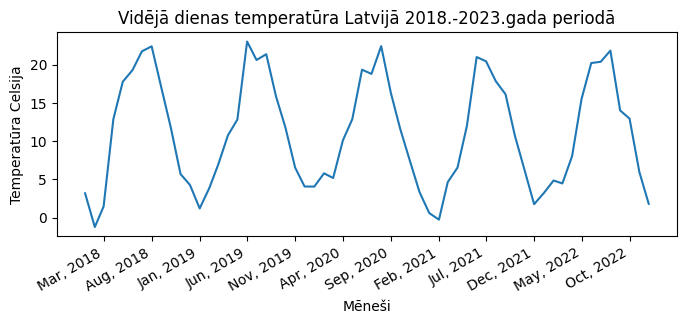

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(8, 3))

half_year_locator = mdates.MonthLocator(interval=5)
month_year_formatter = mdates.DateFormatter('%b, %Y')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(month_year_formatter)

ax.set(title = 'Vidējā dienas temperatūra Latvijā 2018.-2023.gada periodā', xlabel = 'Mēneši', ylabel = 'Temperatūra Celsija')

ax.plot(date, value)
fig.autofmt_xdate()

# **Laikrindu analīze**

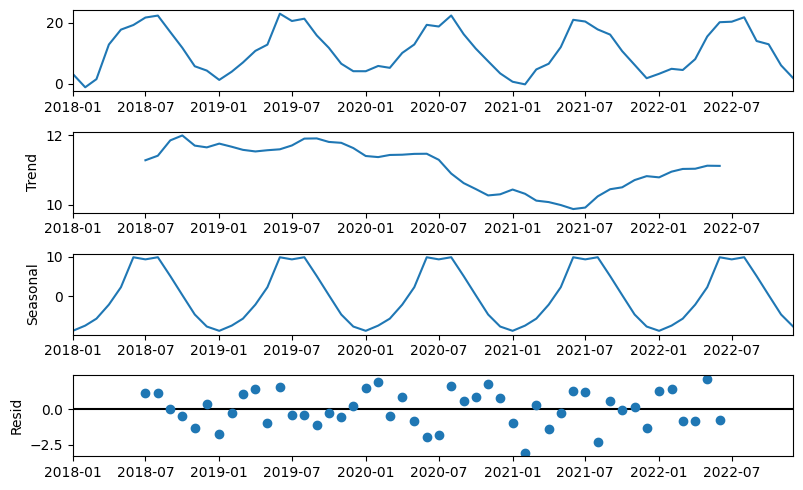

In [ ]:
import matplotlib.pyplot as plt
# seasonal_decompose function import
from statsmodels.tsa.seasonal import seasonal_decompose

# Graphic size
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# Using functions to construct graphs
decompose = seasonal_decompose(temp)
decompose.plot()
plt.show()

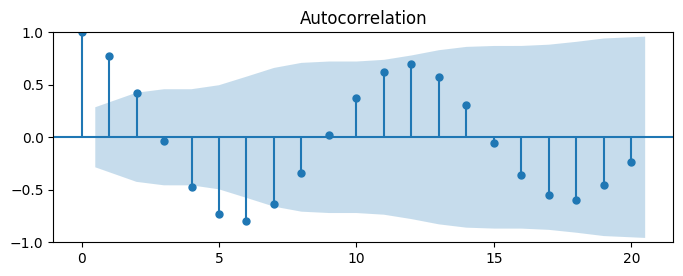

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(temp['Temperatūra'].iloc[13:],lags=20,ax=ax1)

In [ ]:
from statsmodels.tsa.stattools import adfuller
passing_data=adfuller(temp['Temperatūra'])
def adf_test(temperatura):
    result=adfuller(temperatura)
    labels = ['ADF tests', 'p-vērtība']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Laikrinda ir stacionāra")
    else:
        print("Laikrinda nav stacionāra")

In [ ]:
adf_test(temp['Temperatūra'])

ADF tests : -9.585703703334225
p-vērtība : 2.100173238172257e-16
Laikrinda ir stacionāra


# **Data training**

In [ ]:
temperatura = temp['Temperatūra']
# training data enters all data until 2021-12-01
train = temperatura[:'2022-12-01']

# testing data enters open data starting from 2022-01-01
test = temperatura['2022-01-01':]

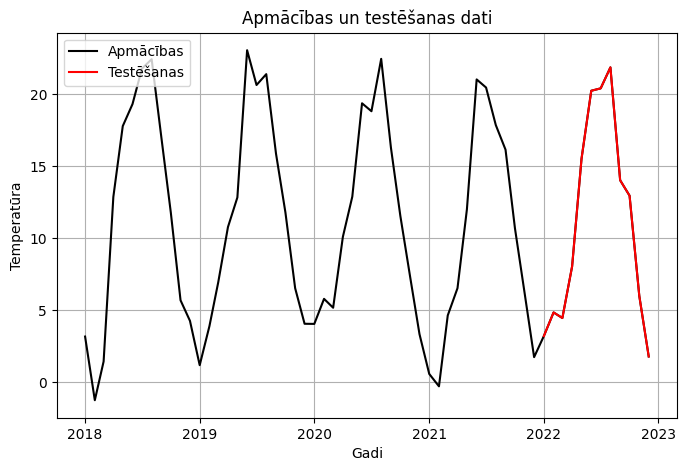

In [ ]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")


plt.title('Apmācības un testēšanas dati')
plt.ylabel('Temperatūra')
plt.xlabel('Gadi')


plt.grid()
rcParams['figure.figsize'] = 7, 3
plt.legend(["Apmācības", "Testēšanas"], loc ="upper left")
plt.show()

In [ ]:
!pip install pmdarima
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=3, max_q=3,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.5 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=345.380, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=481.932, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=352.538, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=424.874, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=339.037, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=338.610, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=337.219, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=336.946, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=304.712, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=336.078, Time=0.07 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=335.163, Time=0.28 sec
 AR

In [ ]:
# import a function for automatic selection of ARIMA model parameters
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

# setting limits
parameter_search = auto_arima(train, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True,
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True)

# result output
print(parameter_search.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=229.838, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=218.673, Time=0.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=227.866, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=231.421, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=218.237, Time=0.37 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=219.740, Time=0.68 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=217.754, Time=0.31 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=219.740, Time=0.73 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=217.787, Time=0.43 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=221.740, Time=0.73 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=216.423, Time=0.26 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=in

In [ ]:
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)


# Sarimax model import
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,
                order = (0, 0, 0),
                seasonal_order = (0, 1, 2, 12))

result = model.fit()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

warnings.simplefilter(action = 'ignore', category = Warning)

model = ARIMA(train,
                order = (3, 0, 2))

result = model.fit()

# **Data forecasting**

Testing interval

In [ ]:
start = len(train)

end = len(train) + len(test) - 1

predictions = result.predict(start = '2022-01-01', end = '2022-12-01')
predictions

2022-01-01     1.101146
2022-02-01     2.303840
2022-03-01     5.583244
2022-04-01     9.851688
2022-05-01    14.733509
2022-06-01    19.027140
2022-07-01    20.986376
2022-08-01    20.019506
2022-09-01    17.068541
2022-10-01    11.778996
2022-11-01     7.208517
2022-12-01     3.081376
Freq: MS, Name: predicted_mean, dtype: float64

Data output

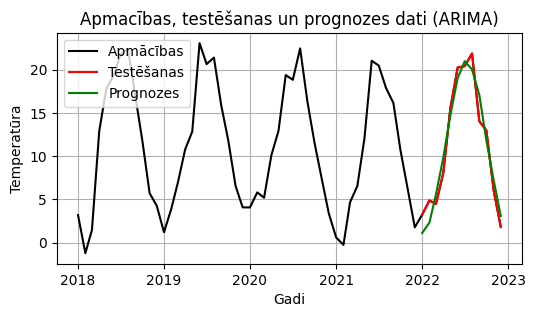

In [ ]:
# Outputs three curves (Training, Testing and Prediction)
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.plot(predictions, color = 'green')

plt.title('Apmacības, testēšanas un prognozes dati (ARIMA)')
plt.ylabel('Temperatūra')
plt.xlabel('Gadi')

plt.grid()
rcParams['figure.figsize'] = 6, 3
plt.legend(["Apmācības", "Testēšanas", "Prognozes"], loc ="upper left")
plt.show()

# **Validation of results**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# mean absolute error (MAE)
print(mean_absolute_error(test, predictions))

# root mean squared error (RMSE)
print(np.sqrt(mean_squared_error(test, predictions)))

1.2218725360217557
1.394774027621455
